# Insurance Claim Prediction

### The dataset contains 15,000 entries with the following columns:

### age: (float64) Age of the person.
### sex: (object) Gender of the person.
### weight: (int64) Weight of the person.
### bmi: (float64) Body Mass Index.
### hereditary_diseases: (object) Hereditary diseases if any.
### no_of_dependents: (int64) Number of dependents.
### smoker: (int64) Whether the person is a smoker (0 or 1).
### city: (object) City of residence.
### bloodpressure: (int64) Blood pressure.
### diabetes: (int64) Whether the person has diabetes (0 or 1).
### regular_ex: (int64) Whether the person exercises regularly (0 or 1).
### job_title: (object) Job title of the person.
### claim: (float64) Insurance claim amount (target variable).

In [119]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [120]:
df=pd.read_csv('healthinsurance.csv')

# Data Analysis

In [121]:
df.head(10)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
5,42.0,female,89,37.9,NoDisease,0,0,AtlanticCity,78,0,0,Dancer,6474.0
6,18.0,male,59,23.8,NoDisease,0,0,Portland,64,0,0,Singer,1705.6
7,21.0,male,52,26.8,NoDisease,0,0,Cambridge,74,1,0,Actor,1534.3
8,63.0,male,55,NaN,NoDisease,0,0,Hartford,70,1,0,Dancer,13390.6
9,40.0,female,69,29.6,NoDisease,0,0,Springfield,64,1,1,DataScientist,5910.9


In [122]:
df.tail(10)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
14990,43.0,male,72,36.0,NoDisease,3,1,Oklahoma,74,1,0,Manager,42124.5
14991,41.0,female,74,21.8,NoDisease,1,0,Orlando,64,1,0,HomeMakers,13725.5
14992,50.0,female,60,26.2,NoDisease,2,0,Macon,84,1,1,FilmMaker,10494.0
14993,56.0,female,55,25.7,NoDisease,0,0,Huntsville,80,1,0,Dancer,11454.0
14994,38.0,female,71,27.3,NoDisease,1,0,Knoxville,0,1,0,Chef,6555.1
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6
14999,52.0,male,57,26.4,NoDisease,3,0,Kingsport,72,1,0,Manager,25992.8


In [123]:
print('shape: ', df.shape)
print('size: ', df.size)

shape:  (15000, 13)
size:  195000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [125]:
df.isna().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [126]:
# finding the avg weight and avg bmi to find the avg height
wt=[]
for i in df['weight']:
    wt.append(i)
avg_wt=sum(wt)/len(wt)

df['bmi'].fillna(value=0, inplace=True)

bmi=[]
for i in df['bmi']:
    if i!=0:
        bmi.append(i)
avg_bmi=sum(bmi)/len(bmi)

m=avg_wt/avg_bmi
height=np.sqrt(m)

# filling null values for bmi
cond_1=df['bmi']==0 
df.loc[cond_1, 'bmi']=df['weight']/(height*height)

In [127]:
# filling null values for age column
df['age'].fillna(value=0,inplace=True)

age=[]
for i in df['age']:
    if i!=0:
        age.append(i)
avg_age=sum(age)/len(age)

cond_2=df['age']==0
df.loc[cond_2, 'age']=avg_age

In [128]:
# encoding sex column
cond_3=df['sex']=='male'
df.loc[cond_3,'sex']=1

cond_4=df['sex']=='female'
df.loc[cond_4,'sex']=0

df['sex']=df['sex'].astype(str).astype(int)

In [129]:
# renaming sex column to gender
df.rename(columns={'sex':'gender'},inplace=True)

# Data Visualization

In [130]:
df

,age,gender,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,1,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,0,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,0,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,0,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,0,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,1,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,1,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,1,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,1,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


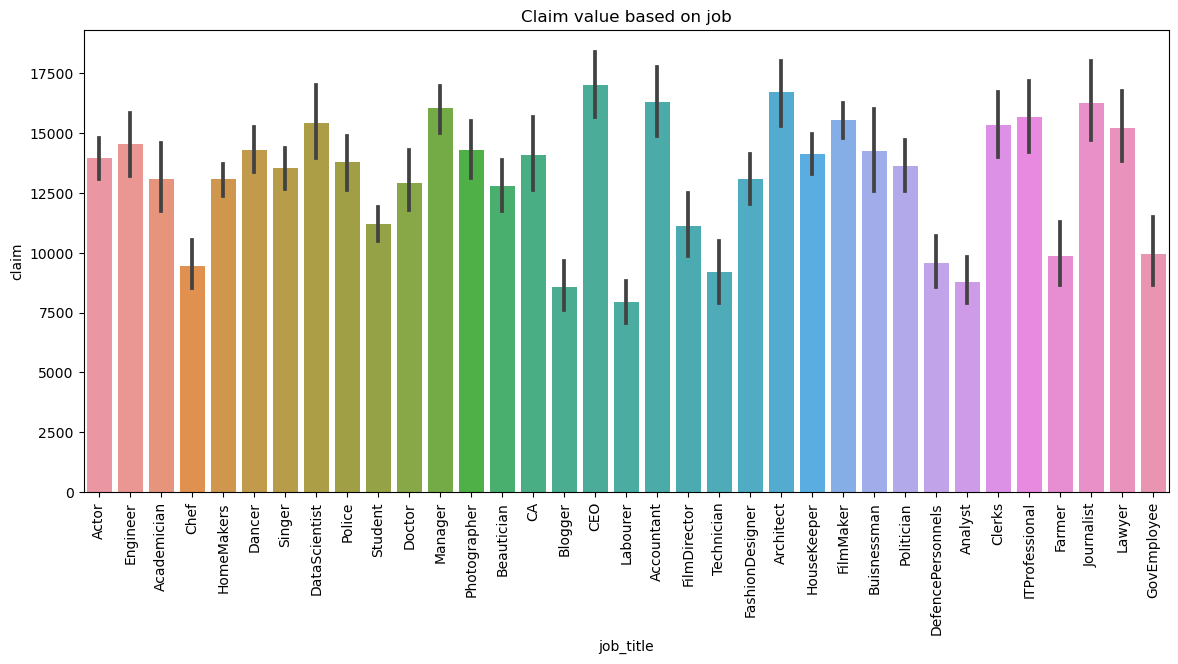

In [137]:
plt.figure(figsize=(14,6))
sns.barplot(x=df['job_title'],y=df['claim'])
plt.title('Claim value based on job')
plt.xticks(rotation=90)
plt.show()

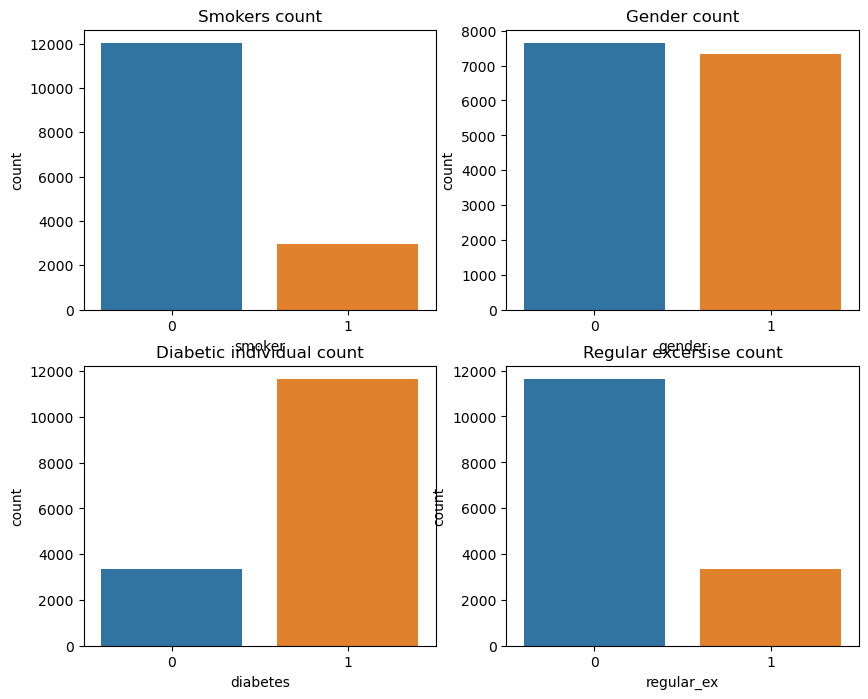

In [149]:
fig=plt.figure(figsize=(10,8))
fig.add_subplot(2,2,1)
sns.countplot(x=df['smoker'])
plt.title('Smokers count')
fig.add_subplot(2,2,2)
sns.countplot(x=df['gender'])
plt.title('Gender count')
fig.add_subplot(2,2,3)
sns.countplot(x=df['diabetes'])
plt.title('Diabetic individual count')
fig.add_subplot(2,2,4)
sns.countplot(x=df['regular_ex'])
plt.title('Regular excersise count')
plt.show()

In [150]:
df[['age','weight','bmi','bloodpressure']].corr()

,age,weight,bmi,bloodpressure
age,1.000000,0.281228,0.183427,-0.008225
weight,0.281228,1.000000,0.302561,-0.020835
bmi,0.183427,0.302561,1.000000,-0.047819
bloodpressure,-0.008225,-0.020835,-0.047819,1.000000


In [152]:
df[['age','weight','bmi','bloodpressure']].skew()

age              0.005652
weight           0.286034
bmi              0.374244
bloodpressure   -1.963879
dtype: float64

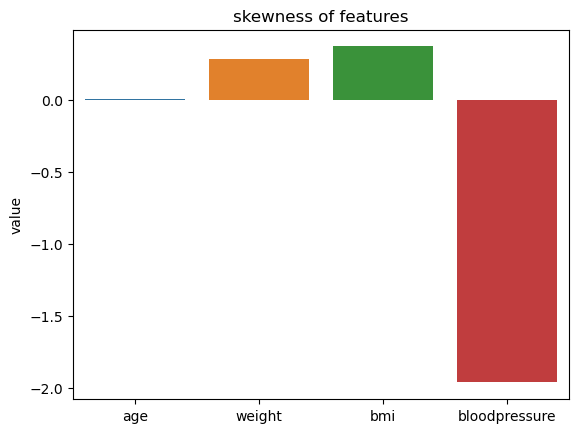

In [156]:
skew=pd.DataFrame(df[['age','weight','bmi','bloodpressure']].skew())
skew.rename(columns={0:'value'}, inplace=True)

sns.barplot(x=skew.index,y=skew['value'])
plt.title('skewness of features')
plt.show()

In [157]:
df.describe()

,age,gender,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,0.489867,64.909600,30.297729,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,13.829705,0.499914,13.701935,6.145901,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,0.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,0.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,0.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,51.000000,1.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,1.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


# Implimenting encoding techinique

In [158]:
pip install category_encoders

In [159]:
import category_encoders as ce

In [160]:
encoder=ce.OrdinalEncoder(cols=['hereditary_diseases','city','job_title'])
encoder.fit(df)

OrdinalEncoder(cols=['hereditary_diseases', 'city', 'job_title'],
               mapping=[{'col': 'hereditary_diseases', 'data_type': dtype('O'),
                         'mapping': NoDisease        1
Epilepsy         2
EyeDisease       3
Alzheimer        4
Arthritis        5
HeartDisease     6
Diabetes         7
Cancer           8
High BP          9
Obesity         10
NaN             -2
dtype: int64},
                        {'col': 'city', 'data_type': dtype('O'),
                         'mapping': NewYork         1
Boston          2
Phildelphia     3
Pittsburg       4
Buffalo         5
               ..
SilverCit...
HomeMakers            5
Dancer                6
Singer                7
DataScientist         8
Police                9
Student              10
Doctor               11
Manager              12
Photographer         13
Beautician           14
CA                   15
Blogger              16
CEO                  17
Labourer             18
Accountant           19
FilmDirector         20
Technician           21
FashionDesigner      22
Architect            23
HouseKeeper          24
FilmMaker            25
Buisnessman          26
Politician           27
DefencePersonnels    28
Analyst              29
Clerks               30
ITProfessional       31
Farmer               32
Journalist           33
Lawyer               34
GovEmployee          35
NaN                  -2
dtype: int64}])

In [161]:
df=encoder.transform(df)

In [162]:
df

,age,gender,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,1,64,24.3,1,1,0,1,72,0,0,1,13112.6
1,49.0,0,75,22.6,1,1,0,2,78,1,1,2,9567.0
2,32.0,0,64,17.8,2,2,1,3,88,1,1,3,32734.2
3,61.0,0,53,36.4,1,1,1,4,72,1,0,4,48517.6
4,19.0,0,50,20.6,1,0,0,5,82,1,0,5,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,1,49,28.3,1,1,1,38,54,1,0,25,21082.2
14996,39.0,1,74,29.6,1,4,0,39,64,1,0,10,7512.3
14997,20.0,1,62,33.3,1,0,0,40,52,1,0,22,1391.5
14998,52.0,1,88,36.7,1,0,0,41,70,1,0,32,9144.6


# Sclaing Techinique

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
x=df.drop(columns='claim')
y=df['claim']

In [166]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)

# Splitting data into training and testing set

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

# Using machine learning algorithm

## 1. Linear Regression

In [171]:
from sklearn.linear_model import LinearRegression

In [172]:
lr=LinearRegression()

In [173]:
lr.fit(x_train,y_train)

LinearRegression()

In [174]:
lr_predection=lr.predict(x_test)

In [175]:
from sklearn import metrics

In [178]:
print('mean squared error: {:.4f}'.format(metrics.mean_squared_error(y_test,lr_predection)))
print('mean absolute error: {:.4f}'.format(metrics.mean_absolute_error(y_test,lr_predection)))
print('R2 score: {:.2f}'.format(metrics.r2_score(y_test,lr_predection)))

mean squared error: 35374993.1504
mean absolute error: 3919.1567
R2 score: 0.77


## 2. Decision Tree

In [180]:
from sklearn.tree import DecisionTreeRegressor

In [181]:
dt=DecisionTreeRegressor()

In [182]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [183]:
dt_prediction=dt.predict(x_test)

In [184]:
print('mean squared error: {:.4f}'.format(metrics.mean_squared_error(y_test,dt_prediction)))
print('mean absolute error: {:.4f}'.format(metrics.mean_absolute_error(y_test,dt_prediction)))
print('R2 score: {:.2f}'.format(metrics.r2_score(y_test,dt_prediction)))

mean squared error: 7928415.6148
mean absolute error: 458.7382
R2 score: 0.95


## 3. Random Forest

In [186]:
from sklearn.ensemble import RandomForestRegressor

In [187]:
rf=RandomForestRegressor()

In [188]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [189]:
rf_prediction=dt.predict(x_test)

In [190]:
print('mean squared error: {:.4f}'.format(metrics.mean_squared_error(y_test,rf_prediction)))
print('mean absolute error: {:.4f}'.format(metrics.mean_absolute_error(y_test,rf_prediction)))
print('R2 score: {:.2f}'.format(metrics.r2_score(y_test,rf_prediction)))

mean squared error: 7928415.6148
mean absolute error: 458.7382
R2 score: 0.95
